In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\HP\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df_da_us = df[
    (df['job_title_short'] == 'Data Analyst') &
    (df['job_country'] == 'United States') &
    (df['salary_year_avg'].notna())
].copy()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reuse df_exploded if already created
# If not, create it again (safe to rerun)

df_da_us = df_da_us[['job_skills', 'salary_year_avg']].dropna(subset=['job_skills', 'salary_year_avg']).copy()

df_da_us_exploded = df_da_us.explode('job_skills')
df_da_us_skills= df_da_us_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_da_us_skills = df_da_us_skills.rename(columns={'count': 'skill_count', 'median': 'salary_median'})

total_jobs= len(df_da_us)
df_da_us_skills['job_skill_percentage'] = (df_da_us_skills['skill_count'] / total_jobs) * 100
df_da_us_skills = df_da_us_skills[df_da_us_skills['skill_count']>0]
df_da_us_skills


,skill_count,salary_median,job_skill_percentage
job_skills,,,
sql,2508,91000.0,64.839710
excel,1808,84392.0,46.742503
python,1431,97500.0,36.995863
tableau,1364,92875.0,35.263702
sas,926,90000.0,23.940021
...,...,...,...
theano,1,100000.0,0.025853
typescript,1,65000.0,0.025853
vmware,1,147500.0,0.025853


In [17]:
job_limit=5
df_da_us_skills= df_da_us_skills[df_da_us_skills['job_skill_percentage']> job_limit]
df_da_us_skills 


,skill_count,salary_median,job_skill_percentage
job_skills,,,
sql,2508,91000.00,64.839710
excel,1808,84392.00,46.742503
python,1431,97500.00,36.995863
tableau,1364,92875.00,35.263702
sas,926,90000.00,23.940021
r,893,92500.00,23.086867
power bi,838,90000.00,21.664943
powerpoint,462,85000.00,11.944157
word,461,81194.75,11.918304


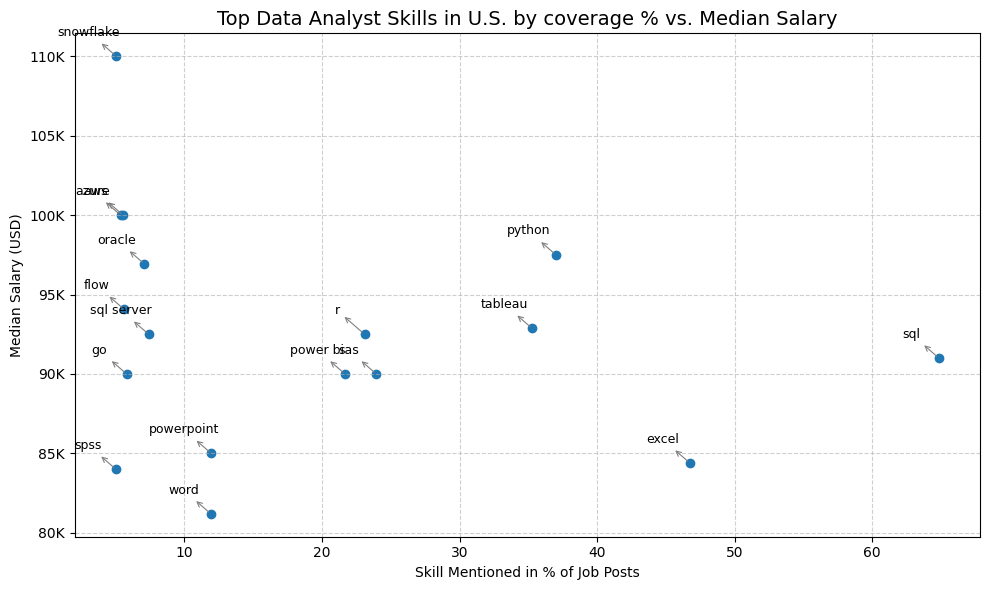

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df_da_us_skills['job_skill_percentage'], df_da_us_skills['salary_median'])

# Alternate label positions to reduce overlap
directions = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
i = 0

for skill, row in df_da_us_skills.iterrows():
    dx, dy = directions[i % len(directions)]  # alternate direction
    plt.annotate(
        skill,
        xy=(row['job_skill_percentage'], row['salary_median']),
        xytext=(row['job_skill_percentage'] + dx * 2, row['salary_median'] + dy * 1500),
        textcoords='data',
        fontsize=9,
        arrowprops=dict(arrowstyle='<-', color='gray', lw=0.8),
        ha='center',
        va='center'
    )

 # Formatting
plt.title("Top Data Analyst Skills in U.S. by coverage % vs. Median Salary", fontsize=14)
plt.xlabel("Skill Mentioned in % of Job Posts")
plt.ylabel("Median Salary (USD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.tight_layout()
plt.show()   



## with seaborn

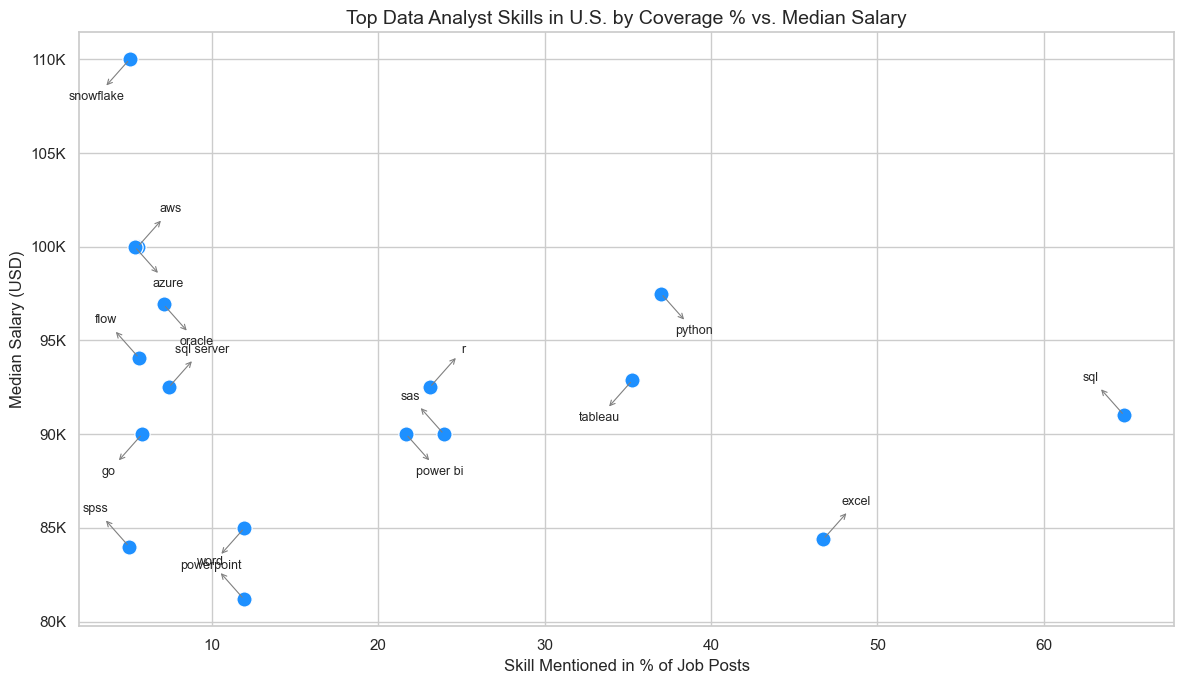

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Sort for consistent layout (optional)
df_plot = df_da_us_skills.sort_values('job_skill_percentage', ascending=False).reset_index()

# Start Seaborn style
sns.set(style="whitegrid")

# Plot with Seaborn
plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=df_plot,
    x='job_skill_percentage',
    y='salary_median',
    s=120,
    color='dodgerblue'
)

# Label placement logic
offsets = [(-2, 2000), (2, 2000), (2, -2000), (-2, -2000)]  # cyclic offsets to reduce clutter
for i, (index, row) in enumerate(df_plot.iterrows()):
    dx, dy = offsets[i % len(offsets)]
    plt.annotate(
        row['job_skills'],  # skill name
        xy=(row['job_skill_percentage'], row['salary_median']),
        xytext=(row['job_skill_percentage'] + dx, row['salary_median'] + dy),
        textcoords='data',
        ha='center',
        va='center',
        fontsize=9,
        arrowprops=dict(arrowstyle='<-', lw=0.8, color='gray'),
    )

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1000)}K'))

# Titles and labels
plt.title("Top Data Analyst Skills in U.S. by Coverage % vs. Median Salary", fontsize=14)
plt.xlabel("Skill Mentioned in % of Job Posts")
plt.ylabel("Median Salary (USD)")
plt.tight_layout()
plt.show()
